<a href="https://colab.research.google.com/github/DevashishX/Deep-Learning-Models/blob/master/DLAZ_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent LSTM Neural Networks from Deep Learning A-Z on Udemy

We try to predict the future stock price of google using LSTM RNN. We use data of previous 5 years to predict the google stock price for month of January 2017.

# Getting the Dataset

In [3]:
!wget https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
!unzip -q P16-Recurrent-Neural-Networks.zip
!mv Recurrent_Neural_Networks/* .

--2020-05-07 16:21:49--  https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Recurrent-Neural-Networks.zip
Resolving sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)... 52.219.84.8
Connecting to sds-platform-private.s3-us-east-2.amazonaws.com (sds-platform-private.s3-us-east-2.amazonaws.com)|52.219.84.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24237 (24K) [application/zip]
Saving to: ‘P16-Recurrent-Neural-Networks.zip’

P16-Recurrent-Neura 100%[===================>]  23.67K   129KB/s    in 0.2s    

2020-05-07 16:21:50 (129 KB/s) - ‘P16-Recurrent-Neural-Networks.zip’ saved [24237/24237]



# Data Preprocessing
we are reading the data from csv files into pandas dataframes, and converting them to numpy arrays. The final dimentions of numpy array will be (n of records aka dates, n of relevant records for set timespan, n of features aka opening date; closing date; volume traded etc)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

Data pre proc using standard scaler

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

we use prices of last 60 days for training / predicting stock price of one day in RNN

In [0]:
prev_days = 120 #originally 60

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(prev_days, 1258):
    X_train.append(training_set_scaled[i-prev_days:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM RNN

In [9]:
%tensorflow_version 2.x
import tensorflow
print(tensorflow.__version__)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

2.2.0-rc4


In [0]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

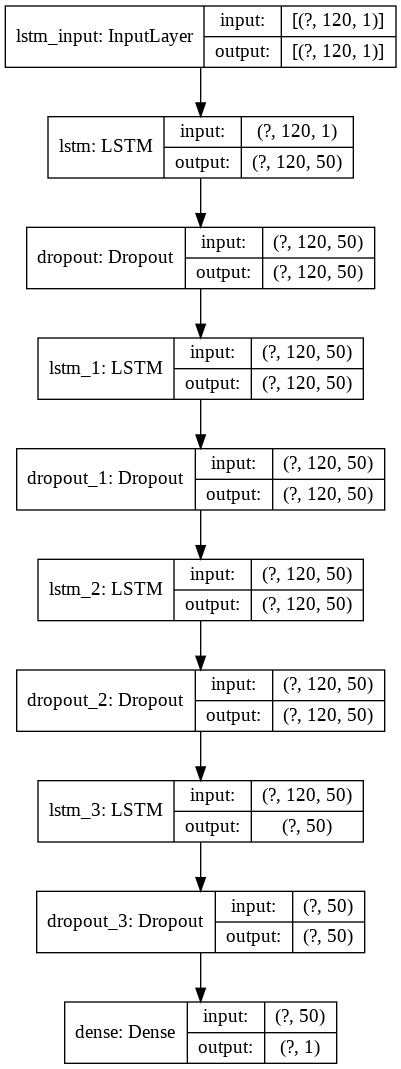

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(regressor, show_shapes=True, show_layer_names=True)

# Fitting the RNN to the Training set

In [34]:
%%time
history = regressor.fit(X_train, y_train, epochs = 250, batch_size = 64)

Epoch 1/250
18/18 [==============================] - 0s 23ms/step - loss: 0.0826
Epoch 2/250
18/18 [==============================] - 0s 22ms/step - loss: 0.0123
Epoch 3/250
18/18 [==============================] - 0s 22ms/step - loss: 0.0065
Epoch 4/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0054
Epoch 5/250
18/18 [==============================] - 0s 22ms/step - loss: 0.0057
Epoch 6/250
18/18 [==============================] - 0s 22ms/step - loss: 0.0055
Epoch 7/250
18/18 [==============================] - 0s 22ms/step - loss: 0.0049
Epoch 8/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0050
Epoch 9/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 10/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0052
Epoch 11/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0051
Epoch 12/250
18/18 [==============================] - 0s 21ms/step - loss: 0.0051
Epoch 13/250
18/18 [=====

In [0]:
regressor.save("RNN_Google_Stock_prev_days_{}.h5".format(prev_days))

In [0]:
from tensorflow.keras.utils import plot_model
plot_model(classifier, show_shapes=True, show_layer_names=True)

# Reding Dataset for prediction

## Read The dataset

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

## Preparing The Dataset for Prediction

In [0]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - prev_days:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(prev_days, prev_days+20):
    X_test.append(inputs[i-prev_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predicting values for Test set

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Plotting the Prediction

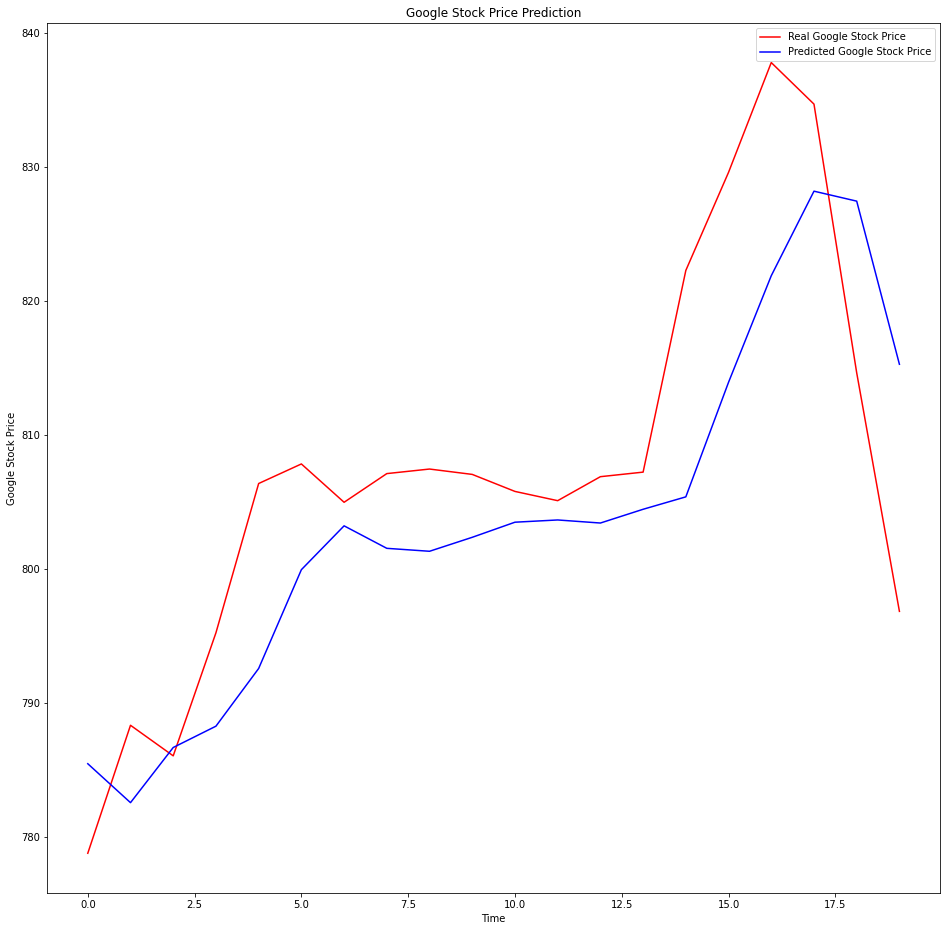

In [39]:
plt.figure(figsize=(16,16))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

as we can see in the above figure, the predicted stock price follows a curve similar to the real stock price. although the values are not the same, the RNN is able to predict the trends in the price fluctuation. The curve is also smoothened as compared to the real curve, which indiacted that the neteork is less susciptible to high fluctuations.